In [ ]:
import pandas as pd
a=pd.read_csv('/archive (2).zip')
print(a)
print(a.head())
print(a.columns)
target_variable = 'Label'
features = a.columns[a.columns != target_variable]
print('Target Variable:', target_variable)
print('Features:',features)

      ID  Age  Gender  Height  Weight   BMI          Label
0      1   25    Male     175      80  25.3  Normal Weight
1      2   30  Female     160      60  22.5  Normal Weight
2      3   35    Male     180      90  27.3     Overweight
3      4   40  Female     150      50  20.0    Underweight
4      5   45    Male     190     100  31.2          Obese
..   ...  ...     ...     ...     ...   ...            ...
103  106   11    Male     175      10   3.9    Underweight
104  107   16  Female     160      10   3.9    Underweight
105  108   21    Male     180      15   5.6    Underweight
106  109   26  Female     150      15   5.6    Underweight
107  110   31    Male     190      20   8.3    Underweight

[108 rows x 7 columns]
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    

<BarContainer object of 108 artists>

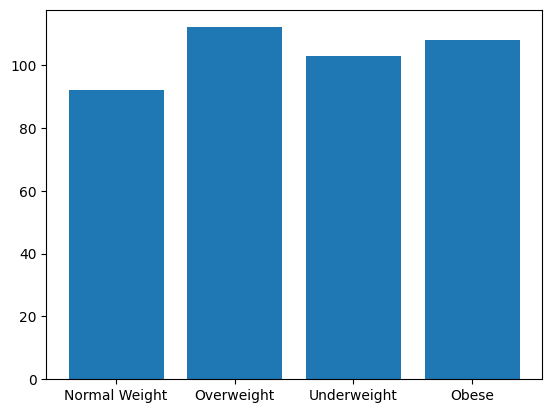

In [ ]:
import matplotlib.pyplot as plt
x1=a['Age']
y=a['Label']
plt.bar(y,x1)

<BarContainer object of 108 artists>

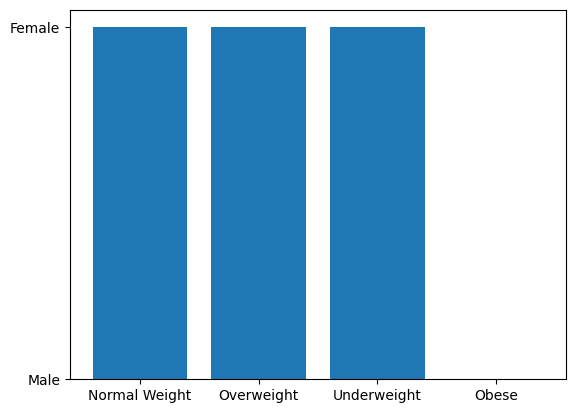

In [ ]:
x2=a['Gender']
plt.bar(y,x2)

<BarContainer object of 108 artists>

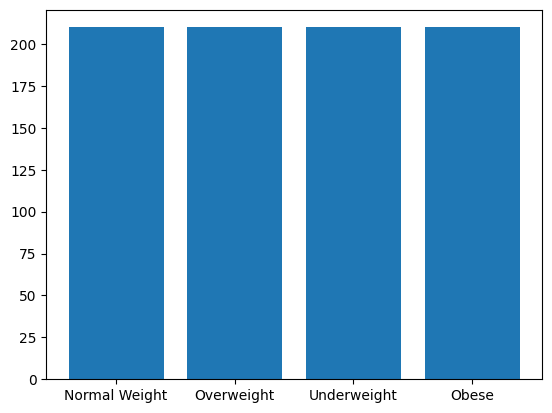

In [ ]:
x3=a['Height']
plt.bar(y,x3)

<BarContainer object of 108 artists>

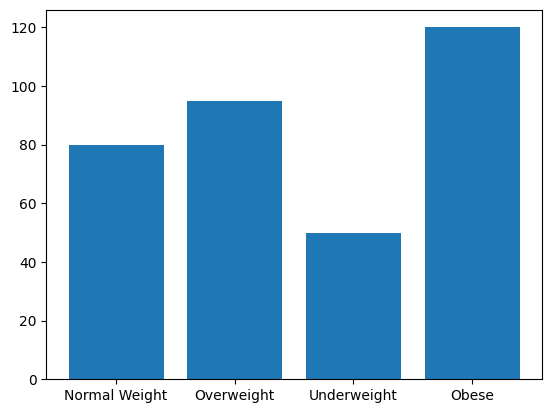

In [ ]:
x4=a['Weight']
plt.bar(y,x4)

<BarContainer object of 108 artists>

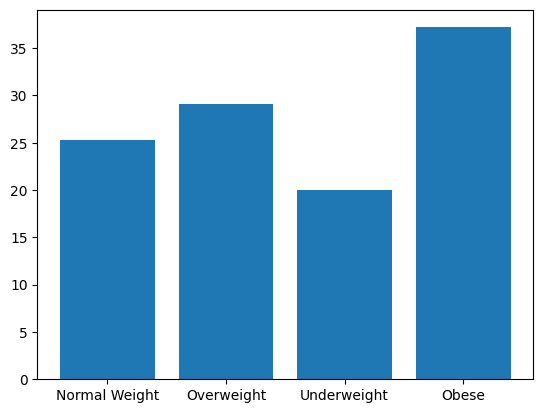

In [ ]:
x5=a['BMI']
plt.bar(y,x5)

In [ ]:
a.drop(labels='ID',axis=1,inplace=True)
a

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


In [ ]:
y=a['Label']
y

0      Normal Weight
1      Normal Weight
2         Overweight
3        Underweight
4              Obese
           ...      
103      Underweight
104      Underweight
105      Underweight
106      Underweight
107      Underweight
Name: Label, Length: 108, dtype: object

In [ ]:
X=a.drop('Label',axis=1)
X

,Age,Gender,Height,Weight,BMI
0,25,Male,175,80,25.3
1,30,Female,160,60,22.5
2,35,Male,180,90,27.3
3,40,Female,150,50,20.0
4,45,Male,190,100,31.2
...,...,...,...,...,...
103,11,Male,175,10,3.9
104,16,Female,160,10,3.9
105,21,Male,180,15,5.6
106,26,Female,150,15,5.6


In [ ]:
X['Gender'] = X['Gender'].replace({'Male': 1, 'Female' : 0})
X

,Age,Gender,Height,Weight,BMI
0,25,1,175,80,25.3
1,30,0,160,60,22.5
2,35,1,180,90,27.3
3,40,0,150,50,20.0
4,45,1,190,100,31.2
...,...,...,...,...,...
103,11,1,175,10,3.9
104,16,0,160,10,3.9
105,21,1,180,15,5.6
106,26,0,150,15,5.6


In [ ]:
y = y.replace({'Normal Weight':1,'Underweight':0,'Overweight':2,'Obese':3})
y

0      1
1      1
2      2
3      0
4      3
      ..
103    0
104    0
105    0
106    0
107    0
Name: Label, Length: 108, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9696969696969697


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[11  0  0  0]
 [ 0  9  0  0]
 [ 0  1  7  0]
 [ 0  0  0  5]]


In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9696969696969697


In [ ]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
y_pred = perceptron_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.696969696969697


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_values = list(range(1, 21))
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

In [ ]:
print(accuracies)

[0.7575757575757576, 0.7878787878787878, 0.7878787878787878, 0.696969696969697, 0.8181818181818182, 0.7272727272727273, 0.7575757575757576, 0.6666666666666666, 0.696969696969697, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6060606060606061, 0.5757575757575758, 0.6060606060606061, 0.5454545454545454, 0.5757575757575758, 0.5757575757575758, 0.5757575757575758]


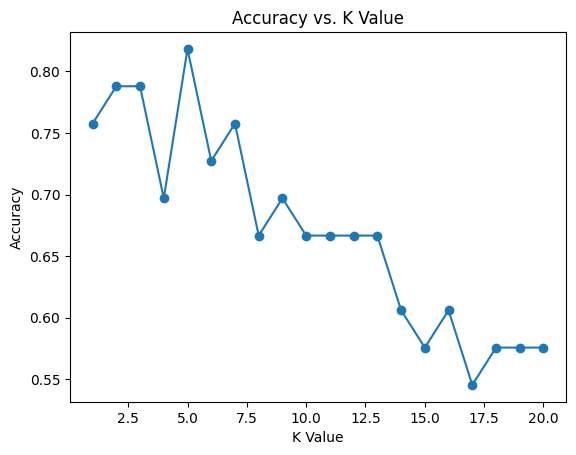

In [ ]:
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

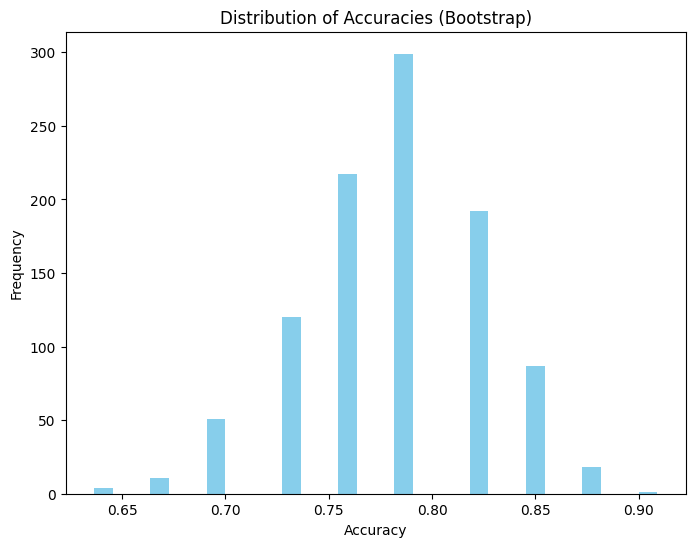

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import resample
n_iterations = 1000
bootstrap_accuracies = []
for _ in range(n_iterations):
    model=LogisticRegression()
    X_train_boot, y_train_boot = resample(X_train, y_train)
    model.fit(X_train_boot, y_train_boot)
    accuracy = model.score(X_test, y_test)
    bootstrap_accuracies.append(accuracy)
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_accuracies, bins=30, color='skyblue')
plt.title('Distribution of Accuracies (Bootstrap)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

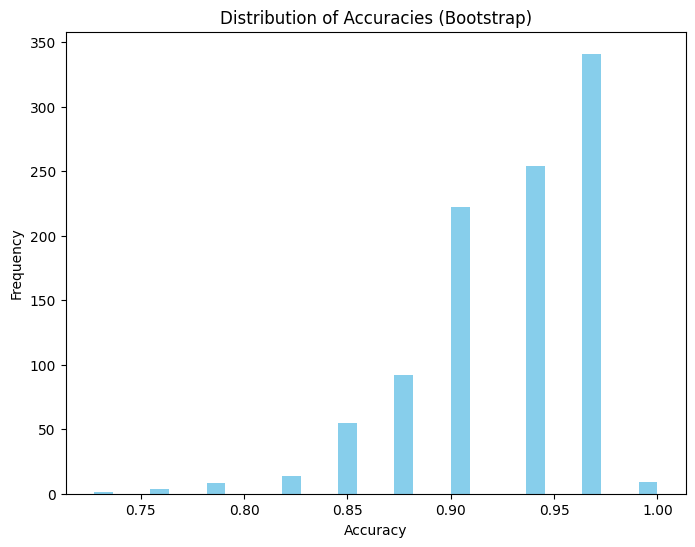

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import resample
n_iterations = 1000
bootstrap_accuracies = []
for _ in range(n_iterations):
    model=SVC(kernel='linear')
    X_train_boot, y_train_boot = resample(X_train, y_train)
    model.fit(X_train_boot, y_train_boot)
    accuracy = model.score(X_test, y_test)
    bootstrap_accuracies.append(accuracy)
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_accuracies, bins=30, color='skyblue')
plt.title('Distribution of Accuracies (Bootstrap)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

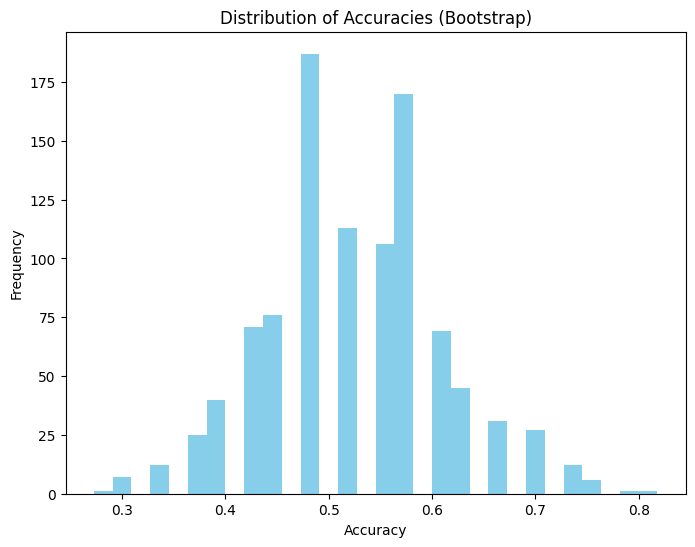

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import resample
n_iterations = 1000
bootstrap_accuracies = []
for _ in range(n_iterations):
    model=Perceptron()
    X_train_boot, y_train_boot = resample(X_train, y_train)
    model.fit(X_train_boot, y_train_boot)
    accuracy = model.score(X_test, y_test)
    bootstrap_accuracies.append(accuracy)
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_accuracies, bins=30, color='skyblue')
plt.title('Distribution of Accuracies (Bootstrap)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

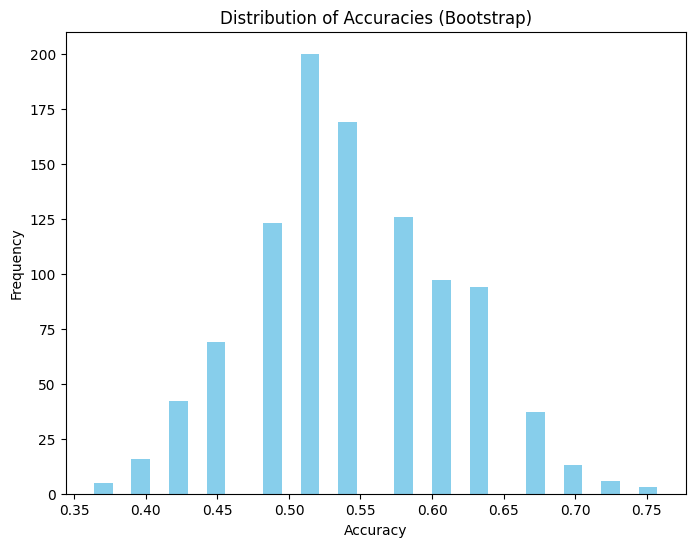

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import resample
n_iterations = 1000
bootstrap_accuracies = []
for _ in range(n_iterations):
    model=KNeighborsClassifier(n_neighbors=k)
    X_train_boot, y_train_boot = resample(X_train, y_train)
    model.fit(X_train_boot, y_train_boot)
    accuracy = model.score(X_test, y_test)
    bootstrap_accuracies.append(accuracy)
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_accuracies, bins=30, color='skyblue')
plt.title('Distribution of Accuracies (Bootstrap)')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()